## Project Part 1: Sentiment vs. Stock Price (Core Concept)
Goal: Understand how market sentiment (based on news headlines) correlates with stock price movement.

Fetch recent news headlines about a company (e.g., Tesla) and analyze the sentiment polarity of each headline. Then compare it with the stock’s recent price trend over the same dates.

In [ ]:

import yfinance as yf


ticker = "TSLA"
tesla = yf.Ticker(ticker)

history=tesla.history(period='1mo')
history.head()



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-13 00:00:00-04:00,320.000000,337.589996,316.799988,334.070007,136992600,0.0,0.0
2025-05-14 00:00:00-04:00,342.500000,350.000000,337.000000,347.679993,136997300,0.0,0.0
2025-05-15 00:00:00-04:00,340.339996,346.140015,334.720001,342.820007,97882600,0.0,0.0
2025-05-16 00:00:00-04:00,346.239990,351.619995,342.329987,349.980011,95895700,0.0,0.0
2025-05-19 00:00:00-04:00,336.299988,343.000000,333.369995,342.089996,88869900,0.0,0.0


In [10]:
# Get news related to Tesla
tesla_news = tesla.news

# Display the first news item
if tesla_news:
    for i, news_item in enumerate(tesla_news[:5]):
        print(f"{i+1}. {news_item['content']['title']}")
        print(f"   Published: {news_item['content'].get('pubDate', 'N/A')}")
        print(f"   Source: {news_item['content'].get('provider', {}).get('name', 'Unknown')}")
        print()

1. Tesla's Texas robotaxi launch: Expect it to be 'low-key'
   Published: 2025-06-12T15:21:25Z
   Source: Unknown

2. Gecko’s AI Robots Represent the ‘Boring’ Future of Bots
   Published: 2025-06-13T04:01:00Z
   Source: Unknown

3. Driverless Teslas Hit the Streets—Analyst Sees More Upside for Tesla (TSLA)
   Published: 2025-06-13T03:11:53Z
   Source: Unknown

4. Tesla (TSLA) Jumps on Looming Robotaxi Launch
   Published: 2025-06-12T22:33:09Z
   Source: Unknown

5. Tesla (TSLA) Stock Dips While Market Gains: Key Facts
   Published: 2025-06-12T21:45:03Z
   Source: Unknown



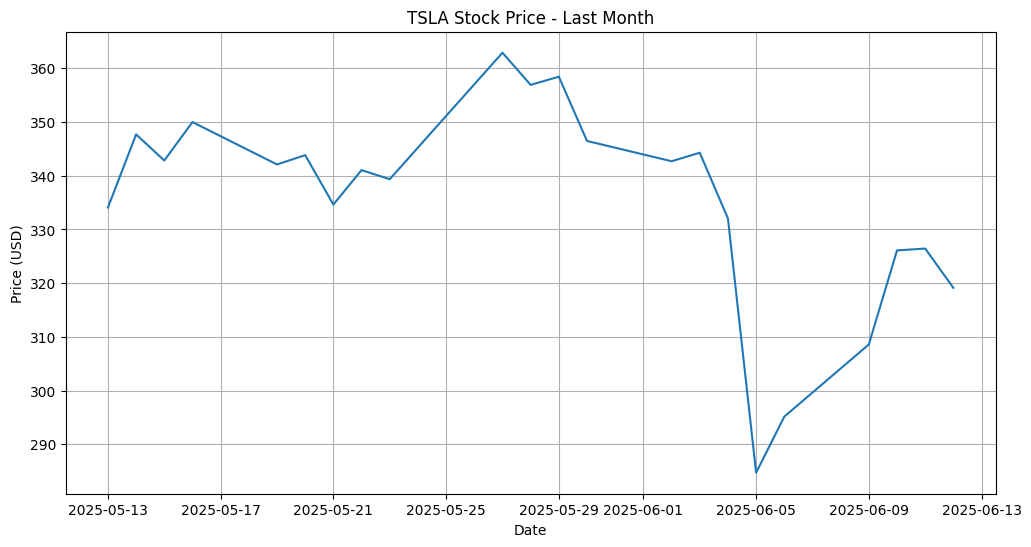

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(history.index, history['Close'])
plt.title(f"{ticker} Stock Price - Last Month")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [12]:
# Get company info
info = tesla.info

# Display basic company information
company_data = {
    "Name": info.get("shortName", "N/A"),
    "Industry": info.get("industry", "N/A"),
    "Sector": info.get("sector", "N/A"),
    "Market Cap": info.get("marketCap", "N/A"),
    "52-Week High": info.get("fiftyTwoWeekHigh", "N/A"),
    "52-Week Low": info.get("fiftyTwoWeekLow", "N/A")
}

pd.Series(company_data)

Name                   Tesla, Inc.
Industry        Auto Manufacturers
Sector           Consumer Cyclical
Market Cap           1027840475136
52-Week High                488.54
52-Week Low                 176.92
dtype: object